In [17]:
import pandas as pd
import datetime
import time
from textblob import TextBlob

In [6]:
df = pd.read_csv('1)DATA/reddit_posts/df_mega_eth.csv')

In [8]:
#df.head(20)

In [10]:
int_time = [int(item) for item in df['timestamp']]

In [11]:
df['timestamp'] = [datetime.datetime.fromtimestamp(item) for item in int_time]

In [12]:
#df['timestamp'] = [time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(item)) for item in int_time] #string not datetime

In [13]:
type(df['timestamp'])

pandas.core.series.Series

In [14]:
#print(df['timestamp'])

In [16]:
#df.head(20) #to check timestamp

In [20]:
df = df[df.text.str.contains("[deleted]") == False]

In [21]:
type(df['text'])

pandas.core.series.Series

In [22]:
df['text'] = [str(item) for item in df['text']]

In [23]:
textblob_objects = [TextBlob(item) for item in df['text']]

In [24]:
print(textblob_objects[0])

Thank you


In [25]:
print(textblob_objects[0].tags)

[('Thank', 'NN'), ('you', 'PRP')]


In [26]:
#now we need to average the sentiment and get and average for each day
#will start with each column gets a sentiment score and 

In [27]:
sent_polarity = [item.sentiment.polarity for item in textblob_objects]

In [28]:
sent_subjectivity = [item.sentiment.polarity for item in textblob_objects]

In [29]:
df['sent polarity'] = sent_polarity

In [30]:
df['sent subjectivity'] = sent_subjectivity

In [31]:
#df.head(20)

In [32]:
#NOW!! how do I average the sentiment for each day?

In [34]:
df['sent polarity'].max()

1.0

In [36]:
df['sent polarity'] =  df['sent polarity'] - df['sent polarity'].min()

In [35]:
df['sent subjectivity']= df['sent subjectivity']-df['sent subjectivity'].min()

In [39]:
df.index = df['timestamp']

In [45]:
df.groupby(df['timestamp'].dt.normalize()).mean().head() #.dt.normalize()) what does this mean? google

,Unnamed: 0,sent polarity,sent subjectivity
timestamp,,,
2017-11-15,1394.214286,1.000000,1.000000
2017-11-16,422.520000,1.078667,1.078667
2017-11-17,406.666667,1.066667,1.066667
2017-11-18,73.333333,1.041667,1.041667
2017-11-19,375.666667,1.130000,1.130000


In [46]:
df_mean = df.groupby(df['timestamp'].dt.normalize()).mean() #.dt.normalize()) what does this mean? google

In [47]:
#df['timestamp'].dt.normalize() #then we do groupby and get mean scores and sentiment

In [48]:
df_mean['sent polarity'].min()

0.8846153846153846

In [49]:
list1 = df_mean['sent polarity'].loc['2017-11-15':'2018-03-21']

In [50]:
print(list1.head())

timestamp
2017-11-15    1.000000
2017-11-16    1.078667
2017-11-17    1.066667
2017-11-18    1.041667
2017-11-19    1.130000
Name: sent polarity, dtype: float64


In [51]:
df_mean['sent polarity'].max()

1.575

In [52]:
mean_list_norm = list1/(df_mean['sent polarity'].max())

In [56]:
mean_list_norm.head()

timestamp
2017-11-15    0.634921
2017-11-16    0.684868
2017-11-17    0.677249
2017-11-18    0.661376
2017-11-19    0.717460
Name: sent polarity, dtype: float64

In [57]:
mean_list_norm.min()

0.5616605616605617

In [58]:
mean_list_norm.max()

1.0

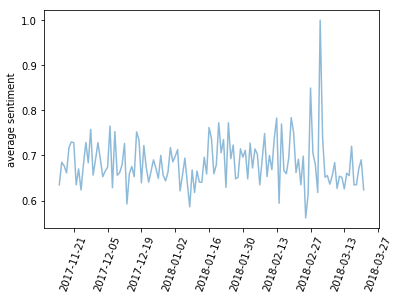

In [60]:
import matplotlib.pyplot as plt
plt.plot(mean_list_norm, alpha = 0.5)
#plt.plot(df_gg_norm, alpha = 0.5)
plt.ylabel('average sentiment')
plt.xticks(rotation=70)
plt.show()

In [61]:
#output df to csv file for later use